#### Figure 3

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


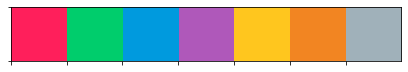

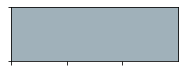

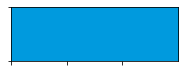

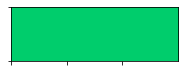

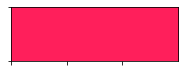

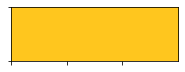

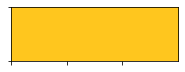

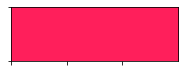

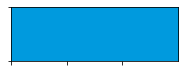

In [1]:
%matplotlib inline
%run settings_load.py

##### Data panel

In [122]:
data = pickle.load(open('waiting_times_files/count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb'))

In [149]:
# well-to-well similarity
celltype = 1 # 0 (active) or 1 (naive)
nwells = data.data_counts.shape[0]
cov_matrix = np.zeros((nwells, nwells))
for i in range(nwells):
    for j in range(nwells):
        well1 = data.data_counts[i, celltype, :]
        well2 = data.data_counts[j, celltype, :]
        cov_matrix[i, j] = np.cov(well1, well2)[0, 1]
cov_matrix.shape

(44, 44)

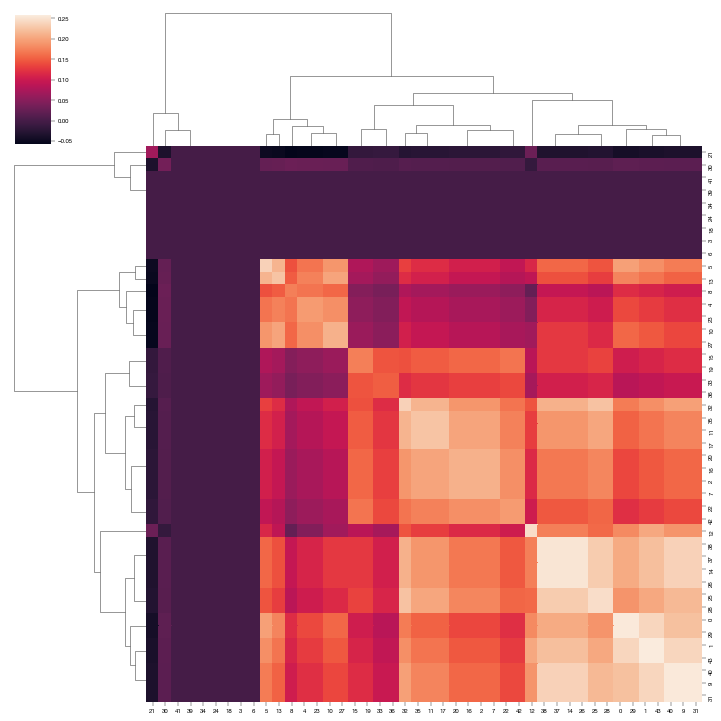

In [150]:
sns.clustermap(cov_matrix)

In [5]:
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb'))

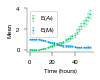

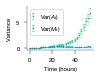

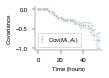

In [68]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.data_mean_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_mean.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.data_variance_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_var.pdf', settings=settings)

settings = {
    ('M_t', 'A_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.data_covariance_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_cov.pdf', settings=settings)

In [6]:
print(data.data_variables)
print(data.data_counts.shape)
print(data.data_counts[26, 0, :])
print(data.data_counts[26, 1, :])
print(np.amax(data.data_counts))

['A_t', 'M_t']
(44, 2, 28)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3.
 4. 4. 5. 5.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
9.0


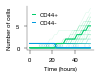

In [7]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

trace_emph = 26
for trace_i in range(data.data_counts.shape[0]):
    if trace_i!=trace_emph:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=cactiv, alpha=0.15, linewidth=0.5)
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=cnaive, alpha=0.15, linewidth=0.5)
    else:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=cactiv, alpha=1.0, linewidth=1.0, label='CD44+', zorder=1000) # color='darkgreen'
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=cnaive, alpha=1.0, linewidth=1.0, label='CD44-', zorder=1000) # color='darkblue'
        
# ax.set_ylim([-0.3, None])
leg = plt.legend()
plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time (hours)')
plt.ylabel('Number of cells')
plt.savefig(f'paper_figures/data_cd44_single_well_traces.pdf', bbox_inches='tight')